In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [3]:
# Descriptivos basicos
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


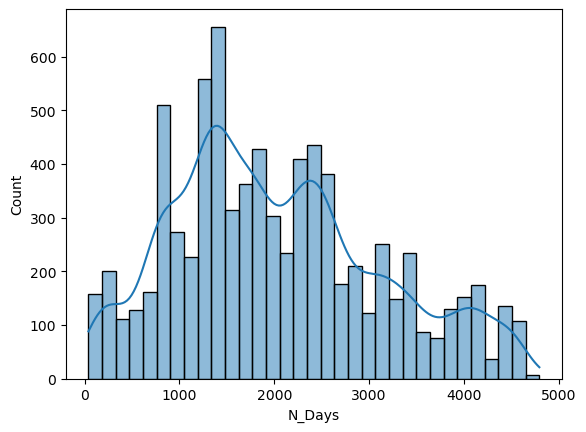

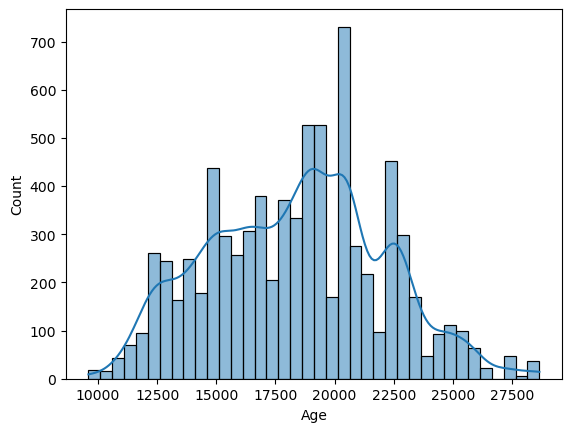

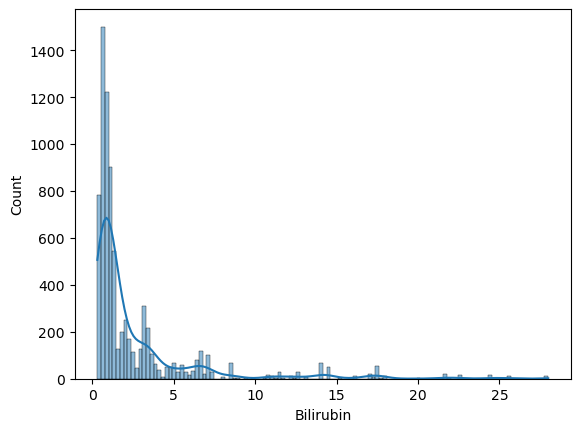

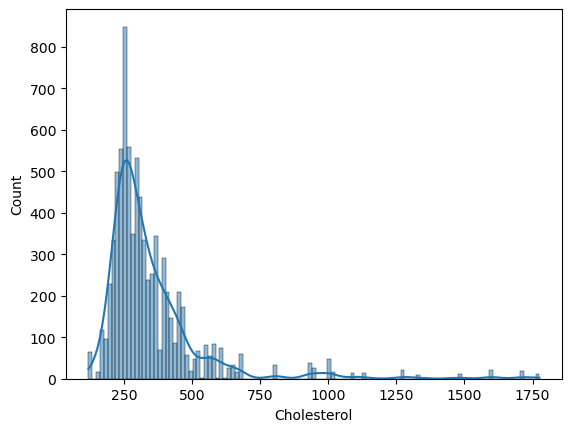

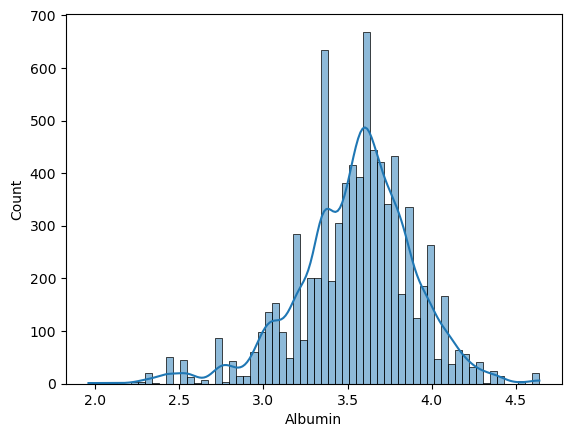

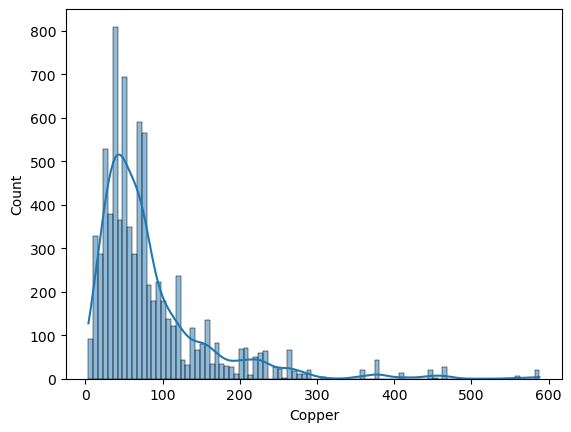

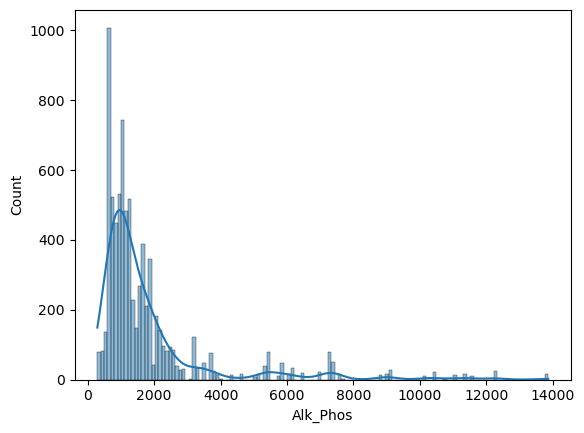

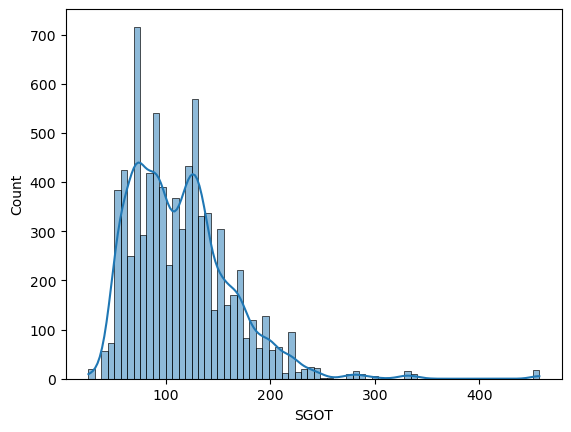

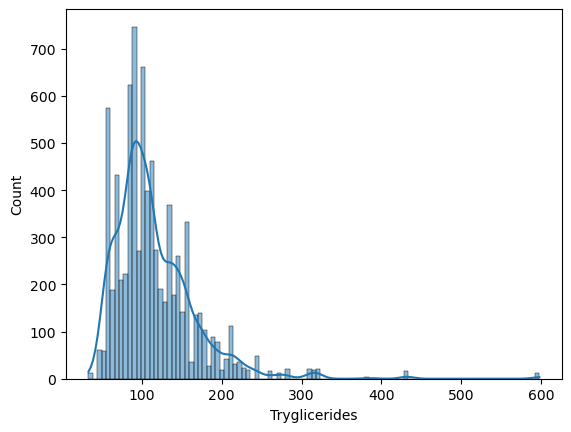

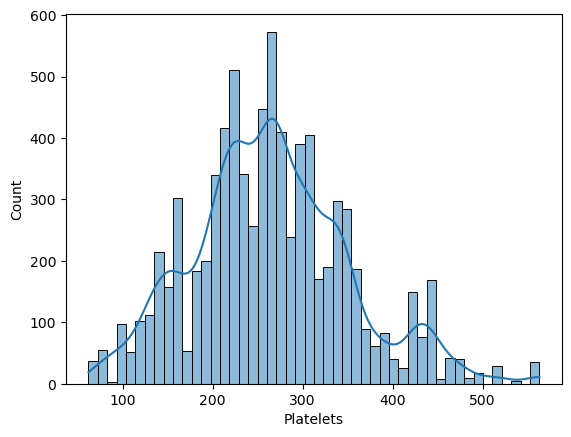

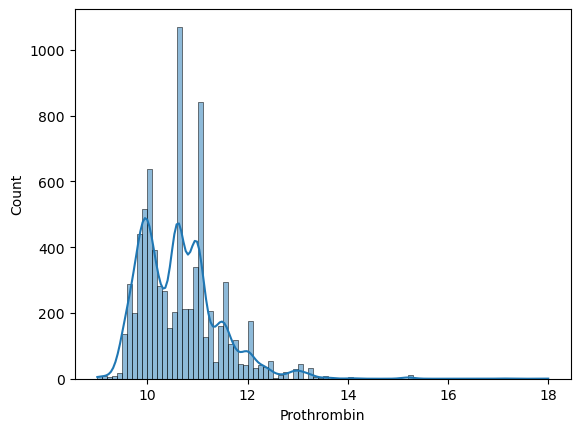

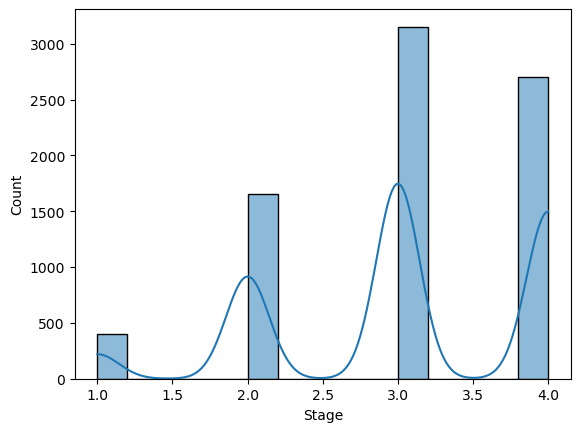

In [9]:
# Visualizacion distribucion de caracteristicas numericas
numerical = df.select_dtypes(include='number')
numerical = numerical.drop('id', axis=1)
for i in numerical.columns:
    sns.histplot(numerical, x = i, kde=True)    
    plt.show()

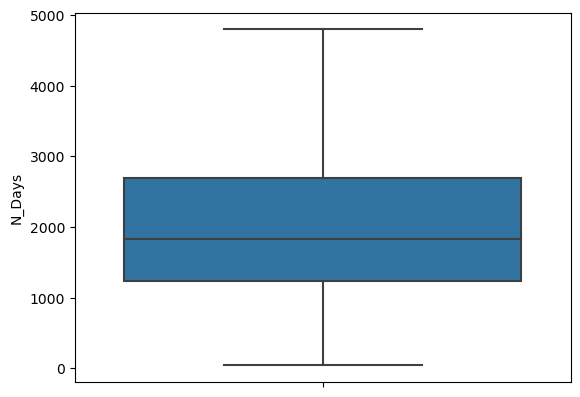

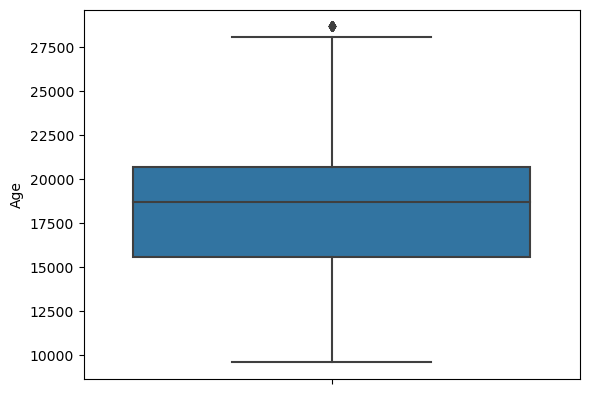

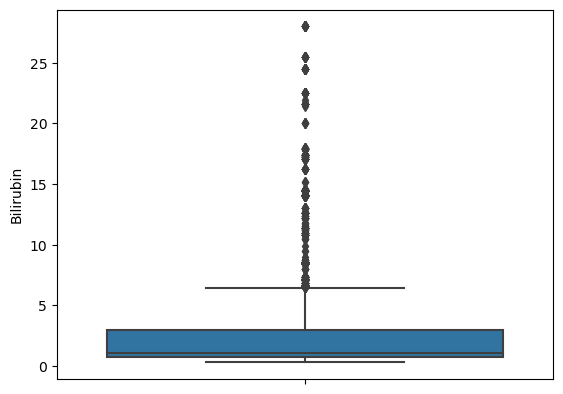

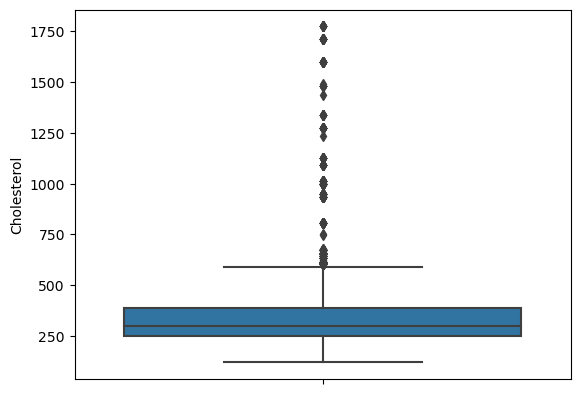

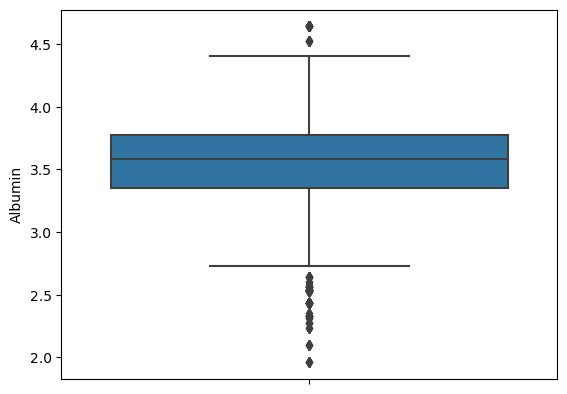

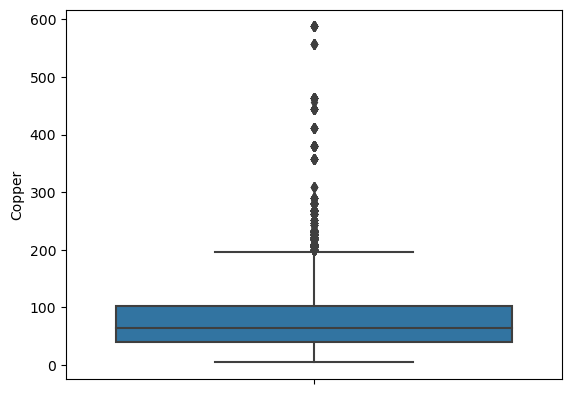

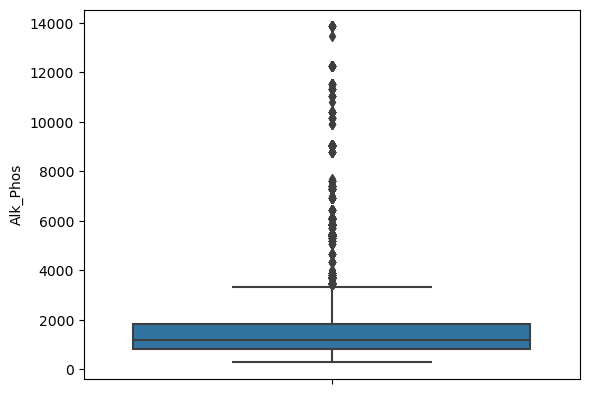

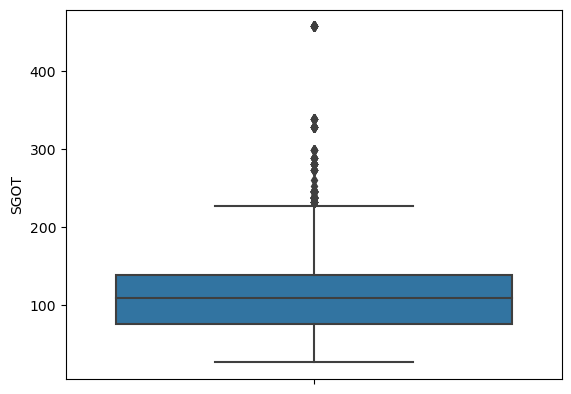

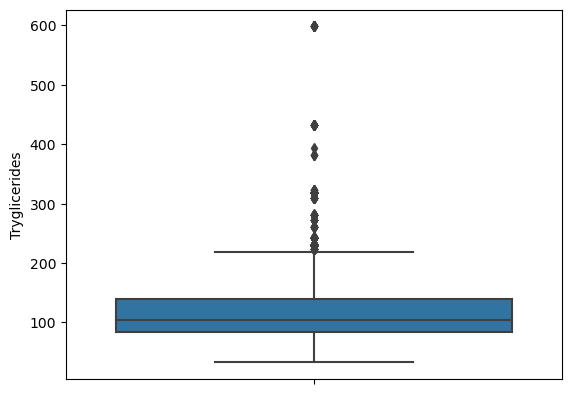

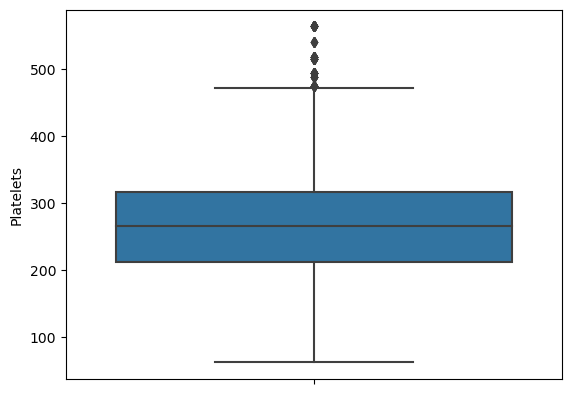

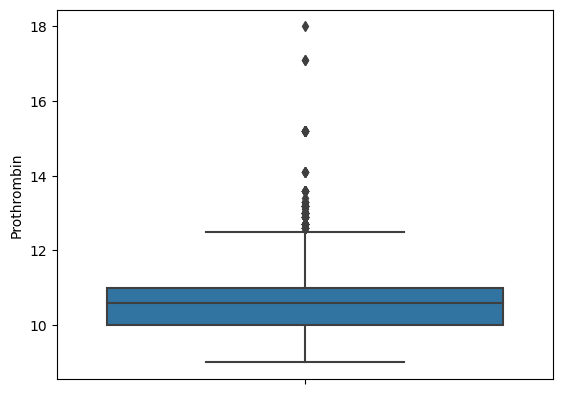

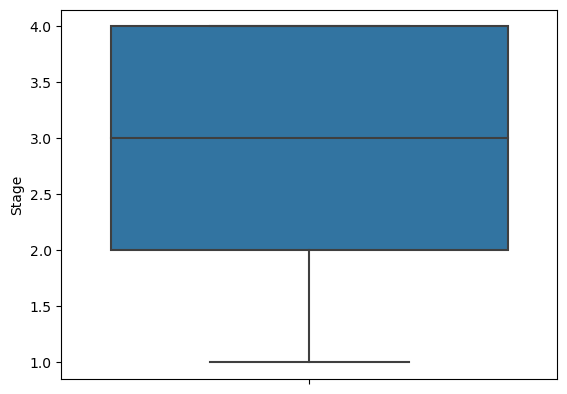

In [14]:
# Visualizacion atipicos
for i in numerical.columns:
    sns.boxplot(numerical, y=i)
    plt.show()

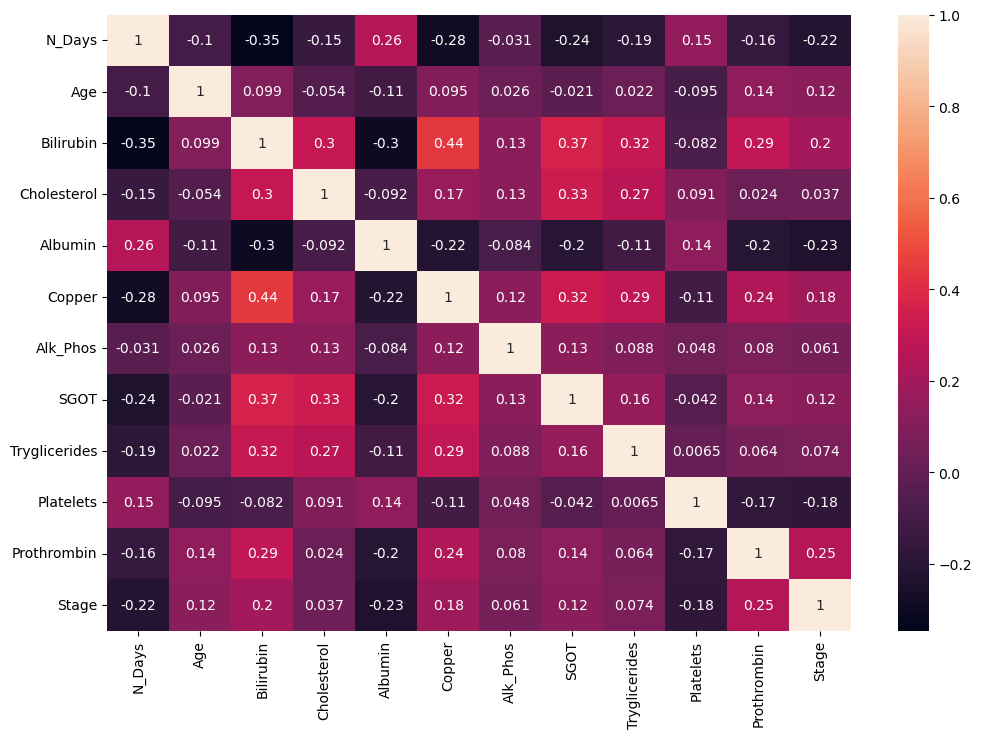

In [11]:
# Correlacion entre variables
matrix_corr = numerical.corr()
# Crear una máscara para ocultar la mitad superior de la matriz
# mask = np.triu(np.ones_like(matrix_corr, dtype=bool))
figure = plt.figure(figsize=(12, 8))
sns.heatmap(matrix_corr, annot=True)
plt.show()

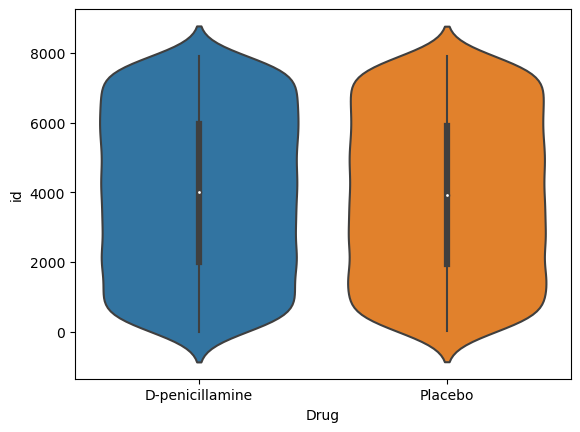

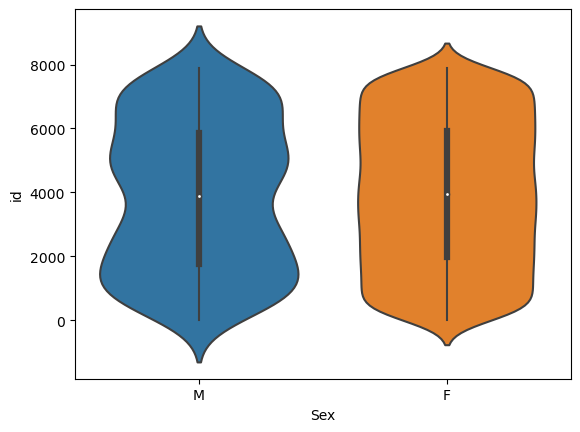

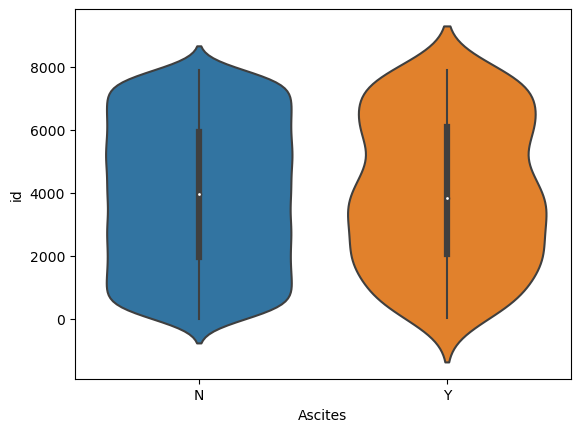

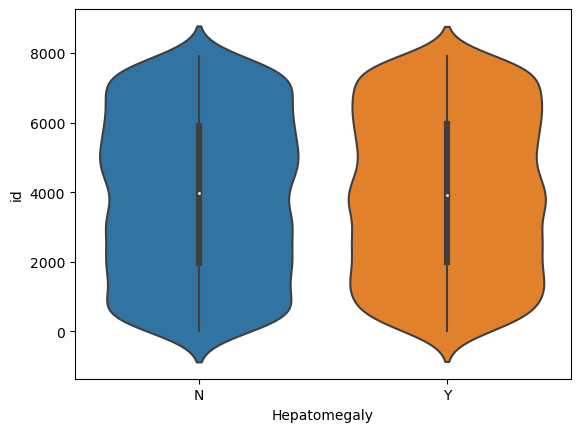

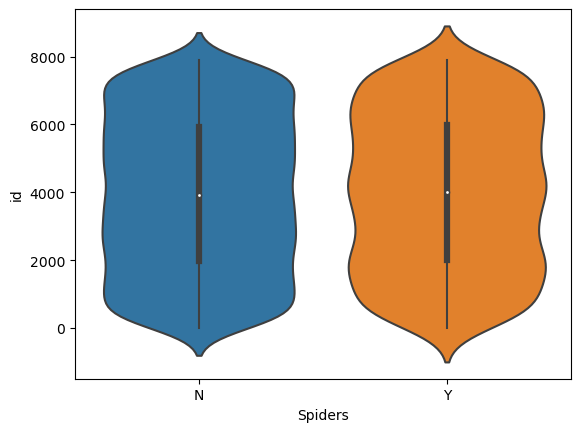

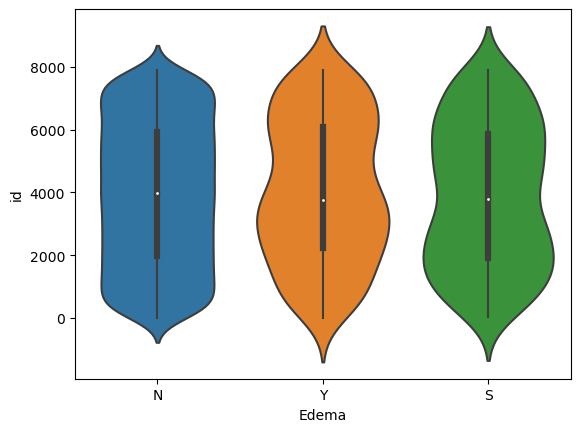

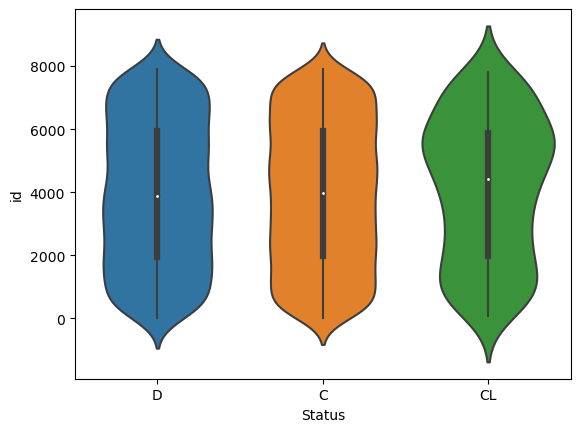

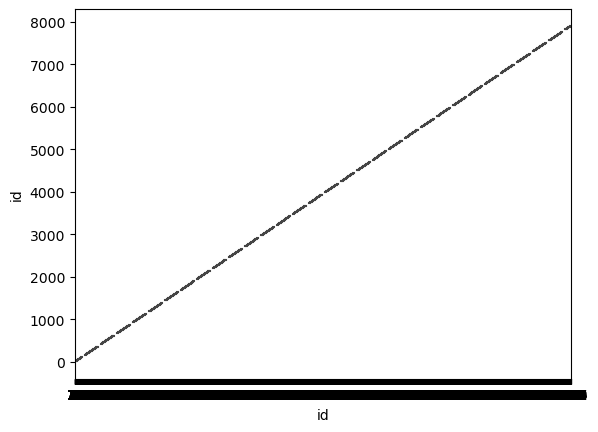

In [23]:
# Visualizacion distribucion variables categoricas
categorical = df.select_dtypes(exclude='number')
categorical['id'] = df['id']
for i in categorical.columns:
    sns.violinplot(categorical,x=i, y='id')
    plt.show()

In [ ]:
# Visualizaciones entre variables (Insights)

In [3]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


<Axes: ylabel='id'>

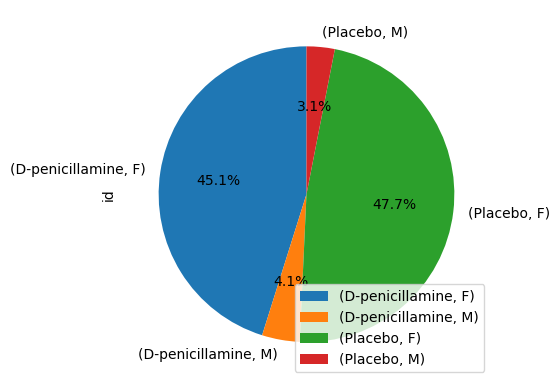

In [24]:
# Visualizar por medicamento y genero la proporcion que alberga el conjunto de datos.
p_drugs = df.groupby(['Drug','Sex']).agg({
    'id':'count'
})

p_drugs.plot.pie(y='id',startangle=90,autopct='%1.1f%%')

<Axes: ylabel='id'>

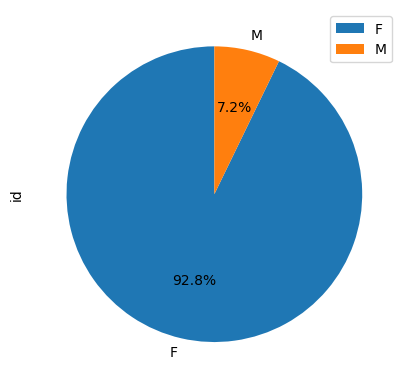

In [25]:
# Proporcion de pacientes femeninos y masculinos.
p_drugs = df.groupby('Sex').agg({
    'id':'count'
})

p_drugs.plot.pie(y='id',startangle=90,autopct='%1.1f%%')

<Axes: ylabel='id'>

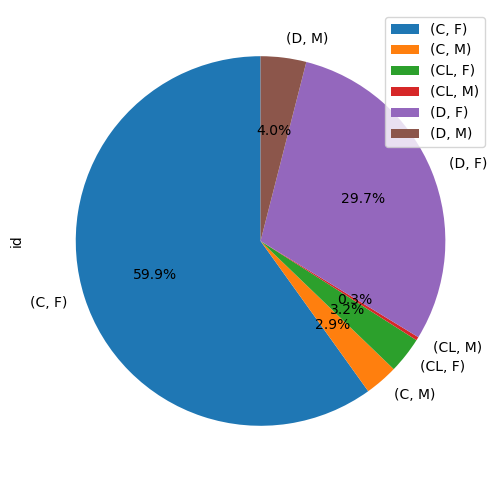

In [32]:
# Proporcion de estados por sexo de pacientes
p_drugs = df.groupby(['Status', 'Sex']).agg({
    'id':'count'
})

p_drugs.plot.pie(y='id',startangle=90,autopct='%1.1f%%',figsize=(6, 6))

<Axes: xlabel='Stage', ylabel='id'>

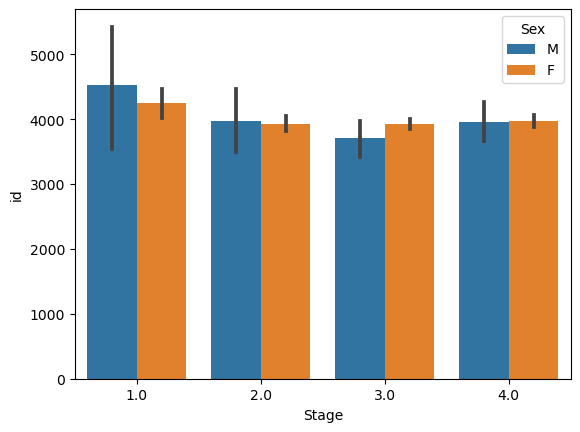

In [35]:
# Magnitud de estadios de cirrosis por sexo
sns.barplot(df, x='Stage', y='id', hue='Sex')

<Axes: xlabel='Status', ylabel='Stage'>

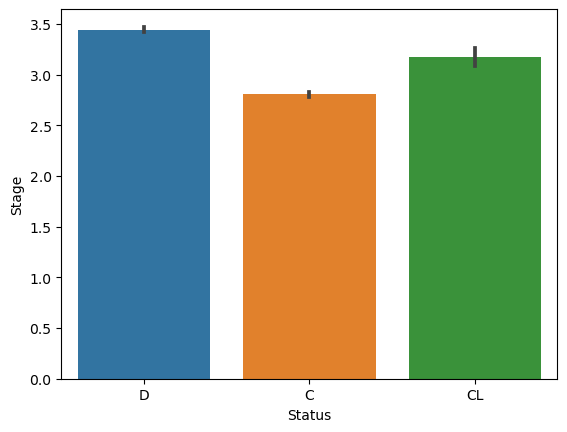

In [37]:
# Magnitud de estados(Status) de cirrosis por estadios(Stage)
sns.barplot(df, x='Status', y='Stage')